<div class="alert alert-block alert-success" style= "text-align:center">
<h2>  The Steps You Need To Follow - A General ML FLOW</h2>
</div>

### <font color='Light Blue'> 1. Set a measurable goal </font>

- **Goal:**......
- **Metric:** .....

### <font color='Light Blue'>2. EDA (Exploratory Data Analysis)</font>

**Goal**: understand as much as possible the data available to define a modeling strategy.

**I - First analysis (Basics):**
- Identification of the target
- Number of rows and columns 
- Identification of missing values 
- Types of variables

**II - Second analysis (Deeper):**
- Target visualization (histogram/boxplot)
- Understanding the different variables (research)
- Visualization of relationships: features/target
- Identification of outliers

### <font color='Light Blue'>3. Pre-processing</font>

**Goal**: to transform the data and put it in a format suitable for machine learning.

- Creating the Train Set / Test Set
- NaN removal: dropna(), imputation, "empty" columns
- Encoding
- Removal of outliers harmful to the model 
- Feature selection
- Feature engineering
- Feature scaling

### <font color='Light Blue'>4. Modeling</font>

**Goal**: to develop a machine learning model capable of meeting the final goal.

- Define an evaluation function
- Training of different models
- Optimization with GridSearchCV
- Error analysis and return to Preprocessing / EDA (in case)
- Learning Curve and Decision Making

<div class="alert alert-block alert-success" style= "text-align:center">
<h4>  APPLICATION - REAL WORLD ISSUE </h4>
</div>

**Let's apply everything we have seen until now using the COVID19 Dataset in [KAGGLE](https://www.kaggle.com/einsteindata4u/covid19).**

### <font color='Light Blue'> 1. Set a measurable goal </font>

- **Goal:** Predict if a person is infected based on the clinical data
- **Metric:** Precision, Recall, F1. Let's try to achieve a F1 score of **50%** and Recall of around **70%**

### <font color='Light Blue'>2. EDA (Exploratory Data Analysis)</font>

**Goal**: understand as much as possible the data available to define a modeling strategy.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel('dataset.xlsx', index_col=0)

In [5]:
data.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  ...  Hb saturation (arterial blood gases)  \
Patient ID                        ...                                         
44477f75e8169d2              NaN  ...                                   NaN   
126e9dd13932f68         0.102004  ...                                   NaN   
a46b4402a0e5696              NaN  ...                                   NaN   
f7d619a94f97c45              NaN  ...                                   NaN   
d9e41465789c2b5              NaN  ...                                   NaN   

                 pCO2 (arterial blood gas analysis)  \
Patient ID                                            
44477f75e8169d2                                 NaN   
126e9dd13932f68                                 NaN   
a46b4402a0e5696                                 NaN   
f7d619a94f97c45                                 NaN   
d9e41465789c2b5                                 NaN   

                 Base excess (arterial blood gas analysis)  \
Patient ID                                                   
44477f75e8169d2                                        NaN   
126e9dd13932f68                                        NaN   
a46b4402a0e5696                                        NaN   
f7d619a94f97c45                                        NaN   
d9e41465789c2b5                                        NaN   

                 pH (arterial blood gas analysis)  \
Patient ID                                          
44477f75e8169d2                        

In [6]:
df = data.copy()

#### <font color='Green'> **I - First analysis (Basics):** </font>

In [7]:
df.shape

(5644, 110)

<AxesSubplot:ylabel='None'>

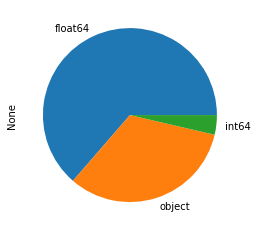

In [8]:
df.dtypes.value_counts().plot.pie()

In [9]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
Patient addmited to intensive care unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 110, dtype: float64

In [10]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

<AxesSubplot:ylabel='Patient ID'>

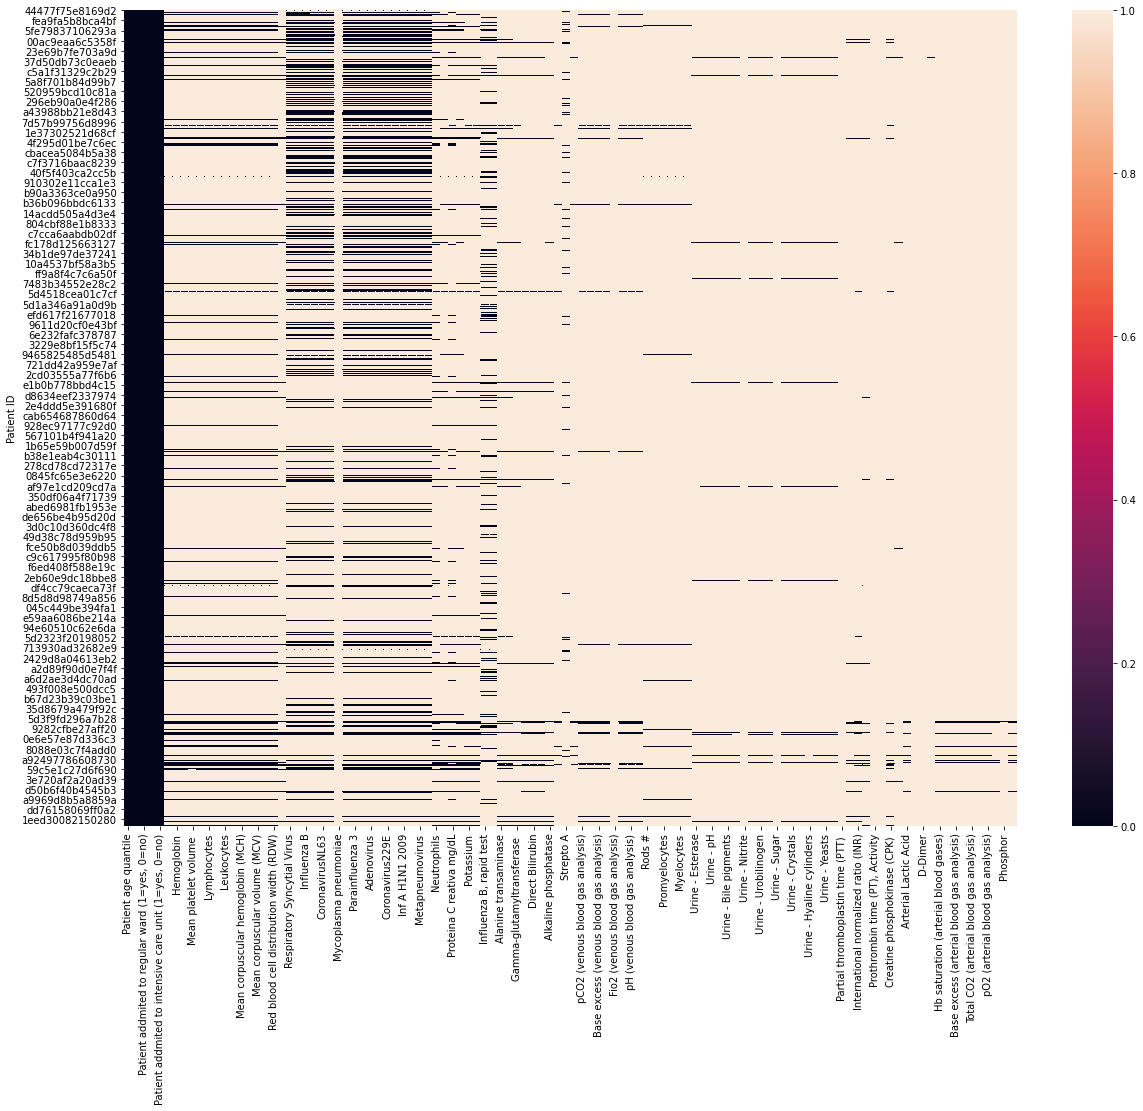

In [11]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.isna())

In [12]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainflue

#### <font color='Green'>**II - Second analysis (Deeper):**</font>

Before anything let's make sure we are dealing with the useful columns

In [13]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \


##### **Target visualization**

In [14]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

##### **Continuous Variables**

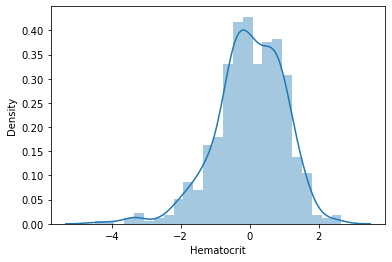

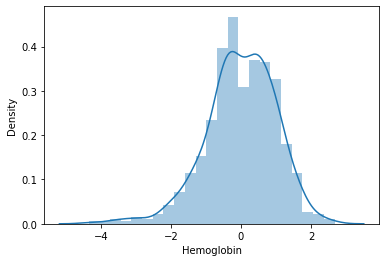

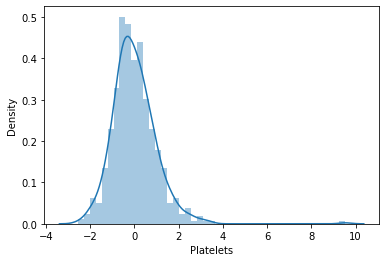

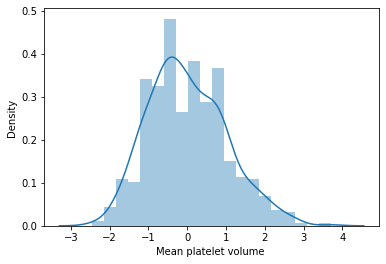

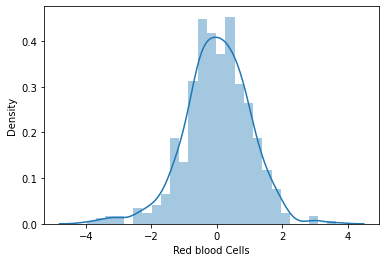

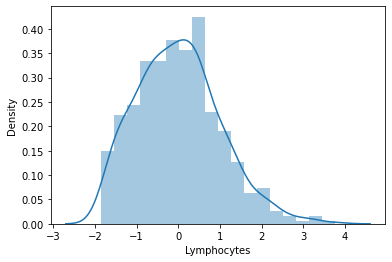

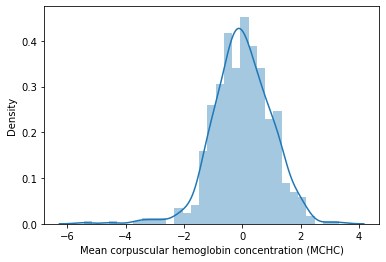

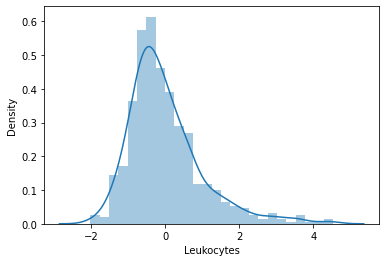

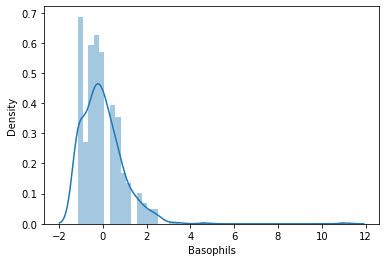

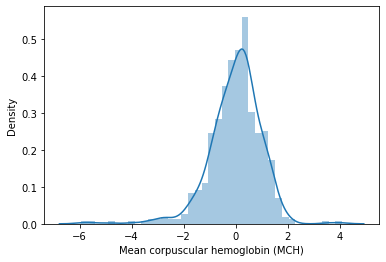

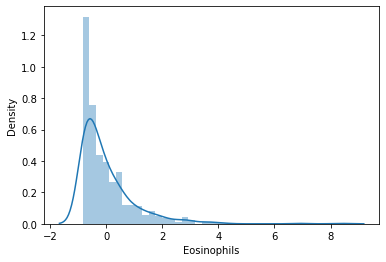

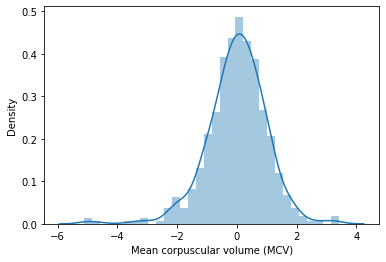

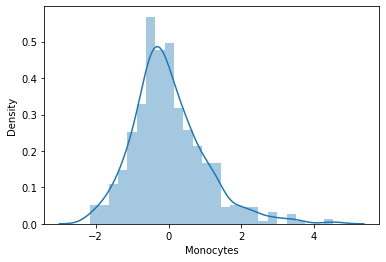

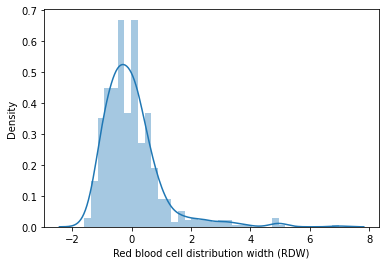

In [15]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

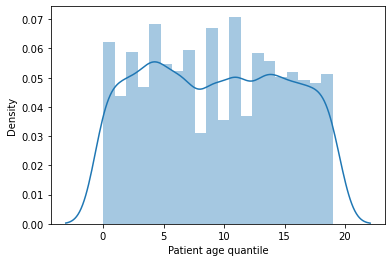

In [16]:
sns.distplot(df['Patient age quantile'], bins=20)

In [17]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

##### **Categorical Variables**

In [18]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

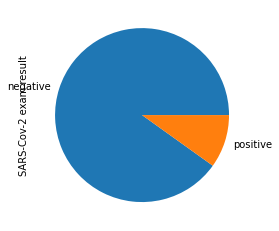

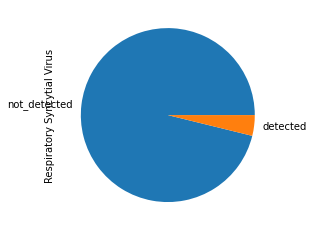

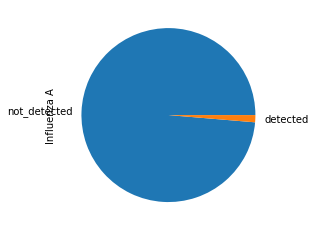

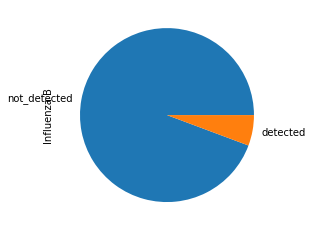

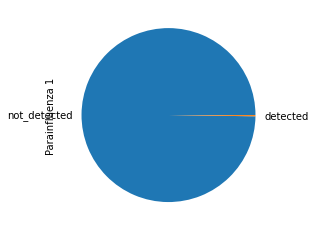

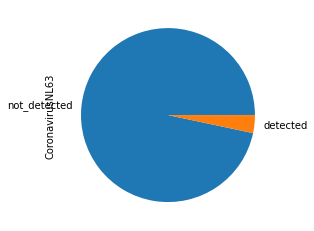

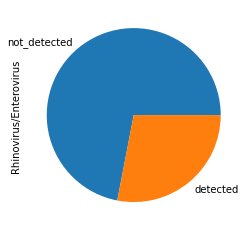

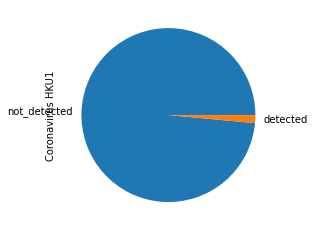

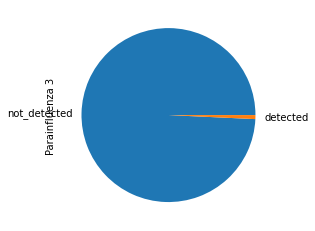

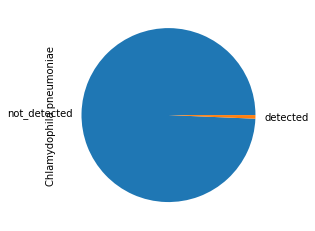

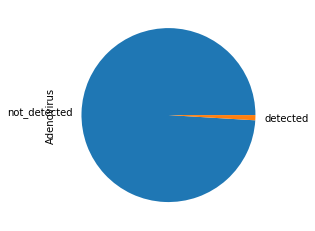

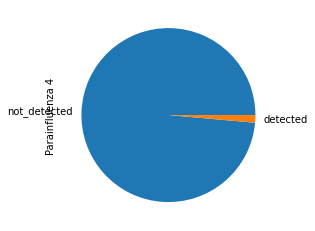

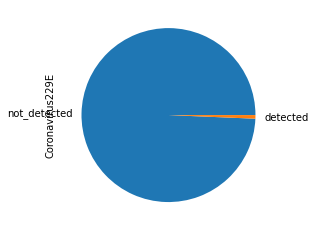

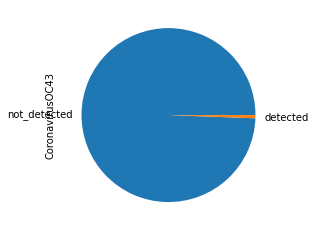

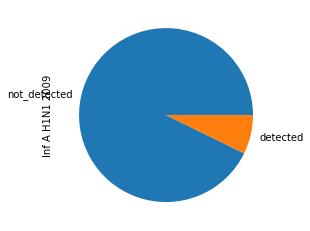

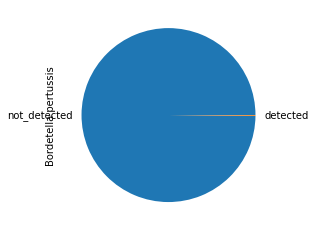

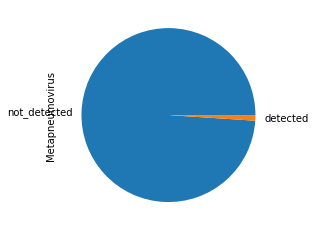

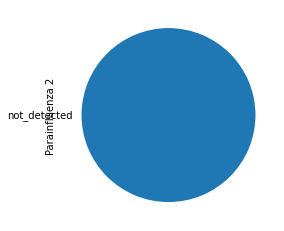

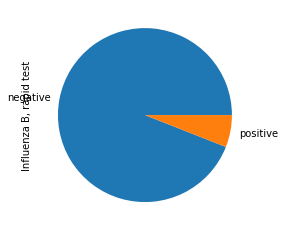

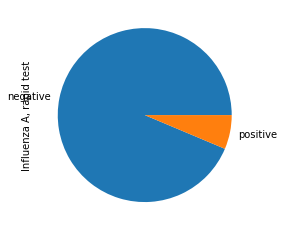

In [19]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

##### **Visualization of relationships: features/target**

Creation of positive and negative subsets

In [20]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [21]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

Creation of Blood and Viral subsets

In [22]:
missing_rate = df.isna().sum()/df.shape[0]

In [23]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate >0.88)]

In [24]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

##### - **Target/Blood**

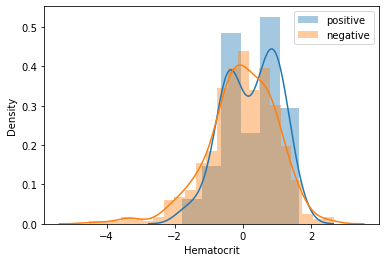

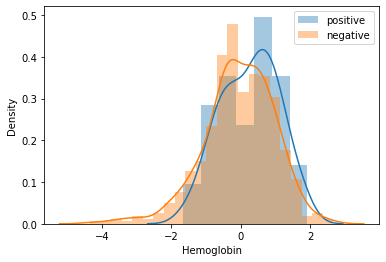

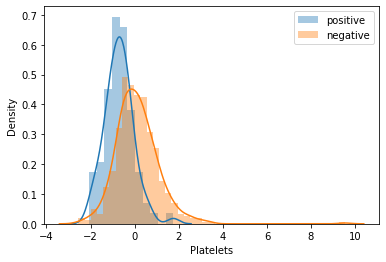

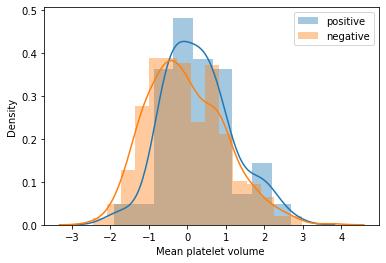

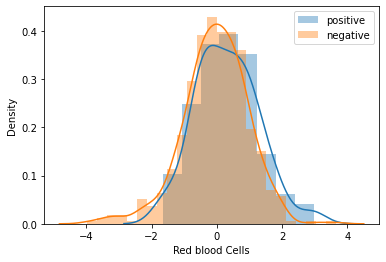

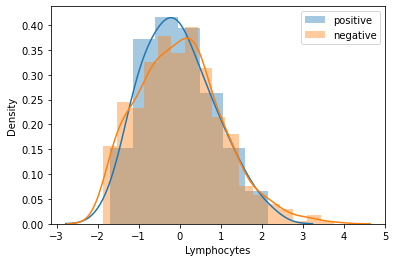

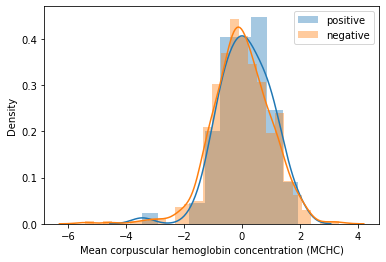

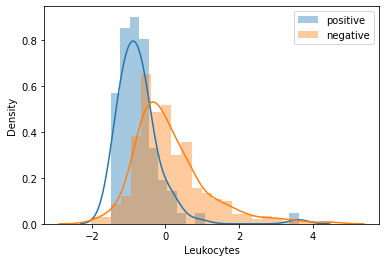

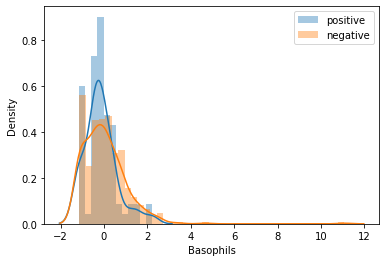

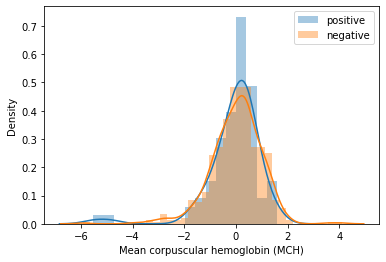

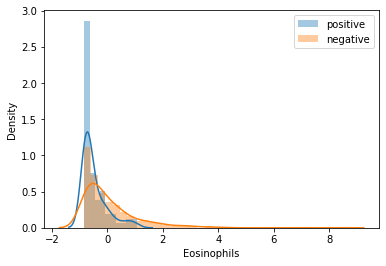

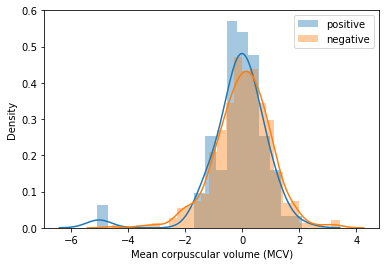

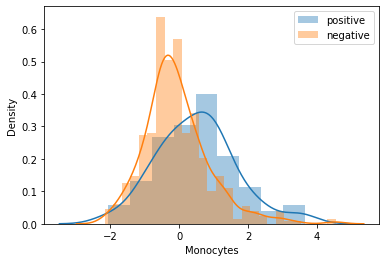

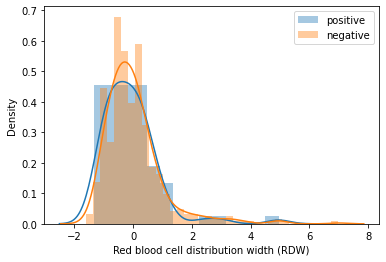

In [25]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

##### - **Target/Age**

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

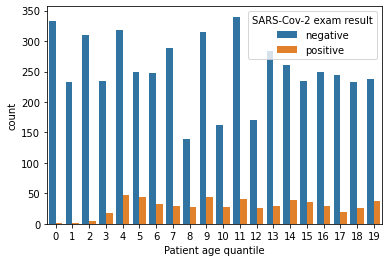

In [26]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

##### - **Target/Viral**

In [27]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

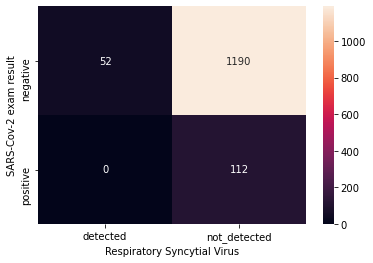

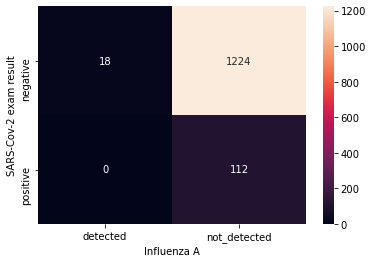

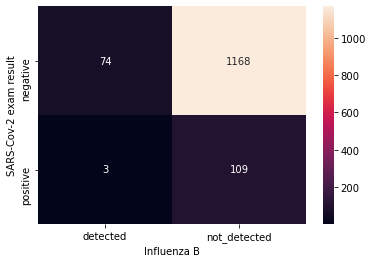

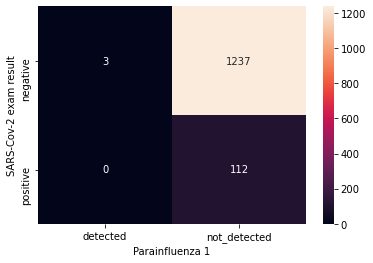

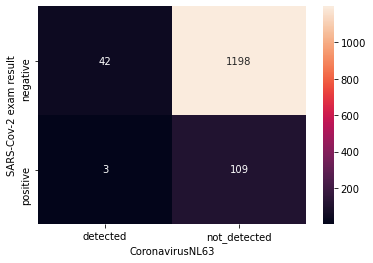

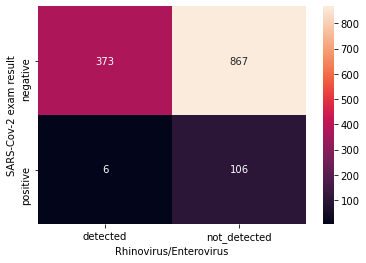

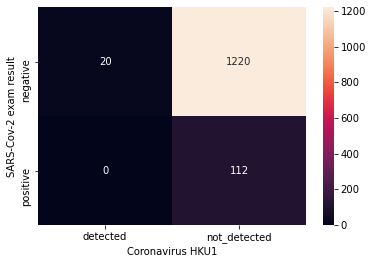

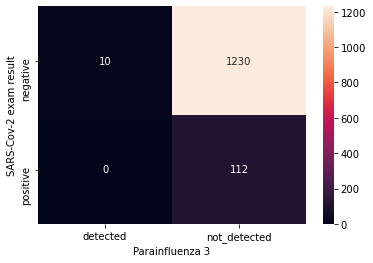

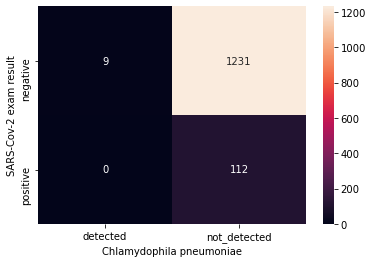

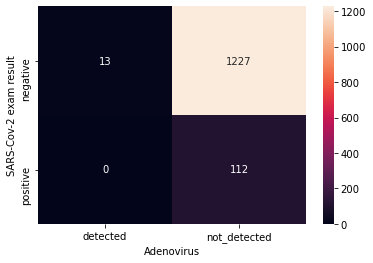

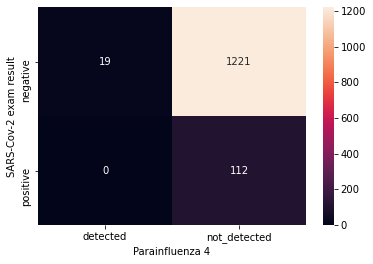

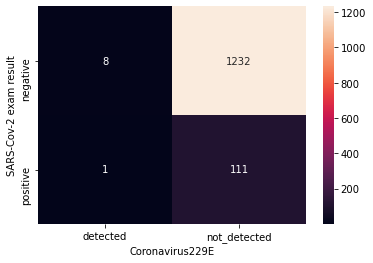

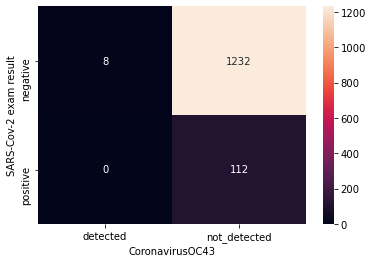

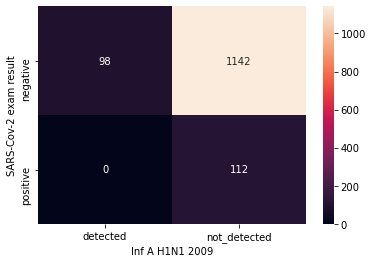

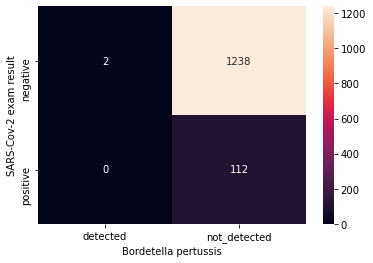

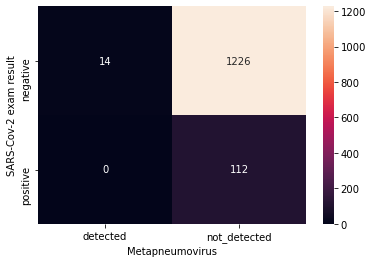

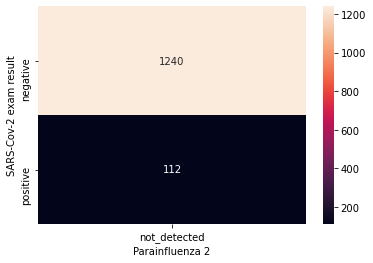

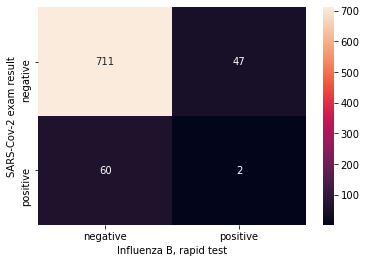

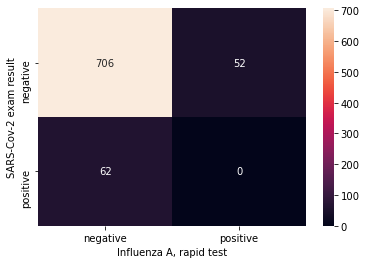

In [28]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

[Research](https://pubmed.ncbi.nlm.nih.gov/31769524/)

##### - **Variable/Variable**

Blood columns

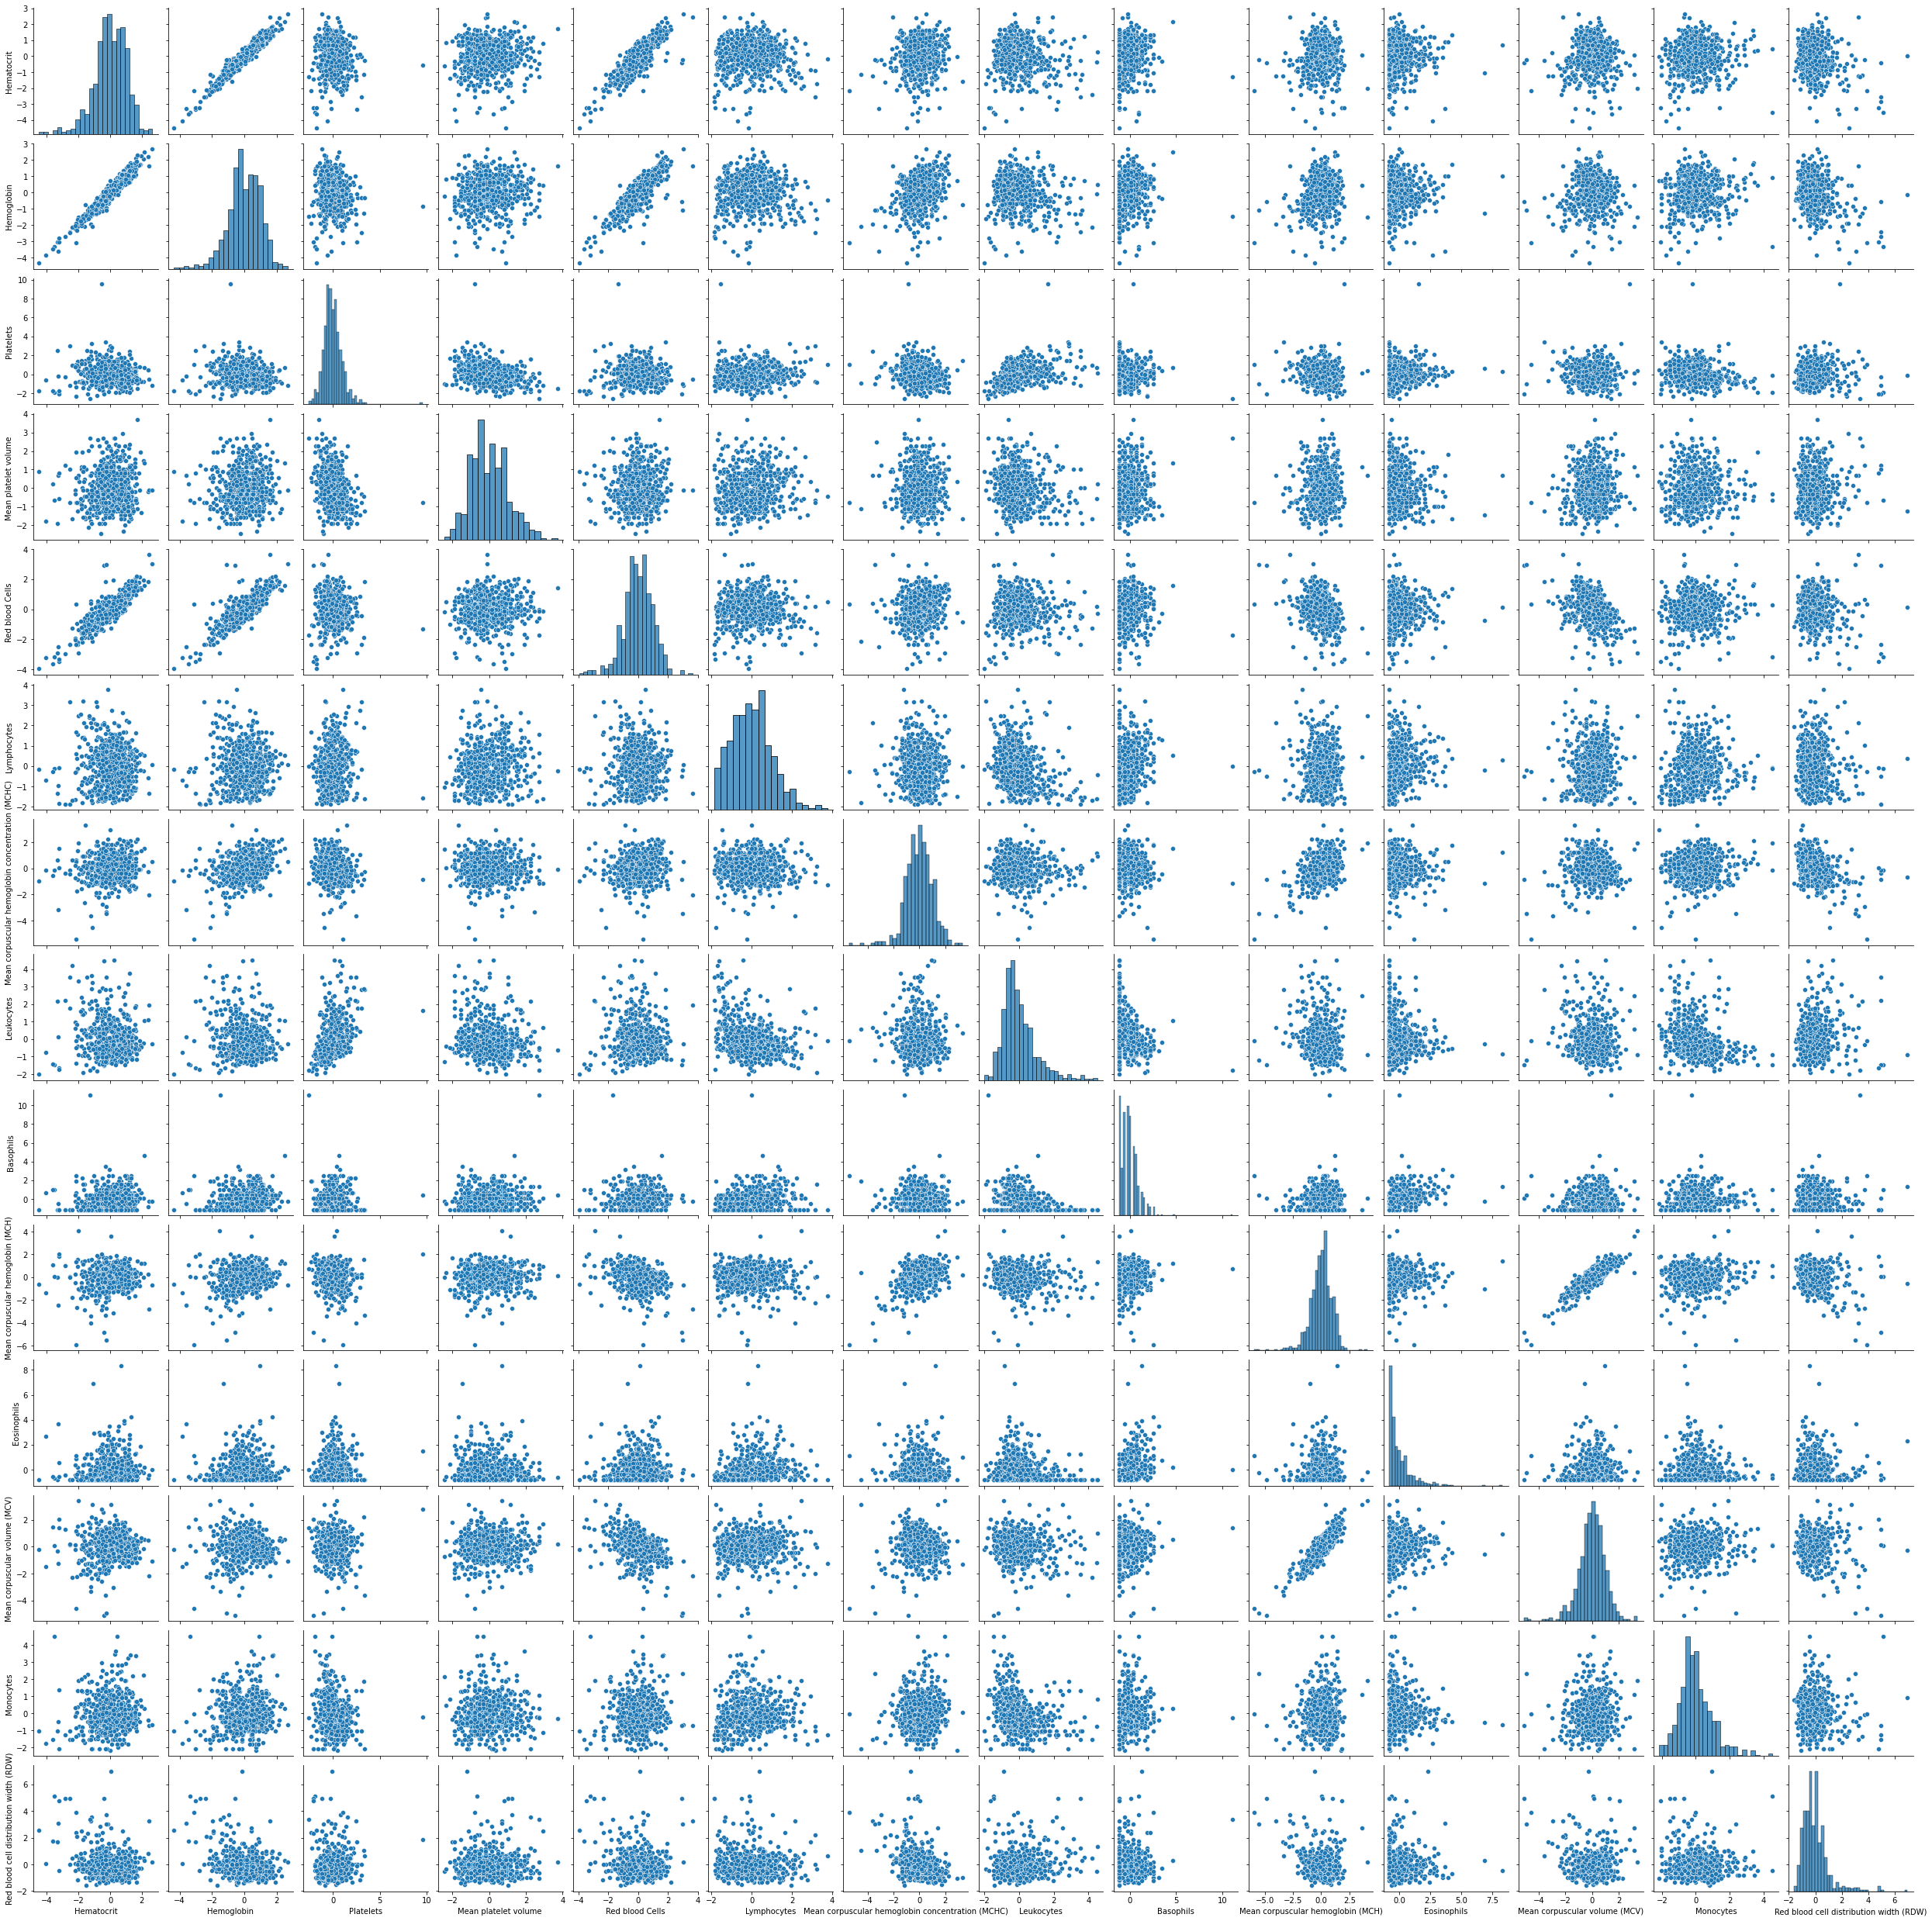

In [29]:
sns.pairplot(df[blood_columns])

<Figure size 1440x720 with 0 Axes>

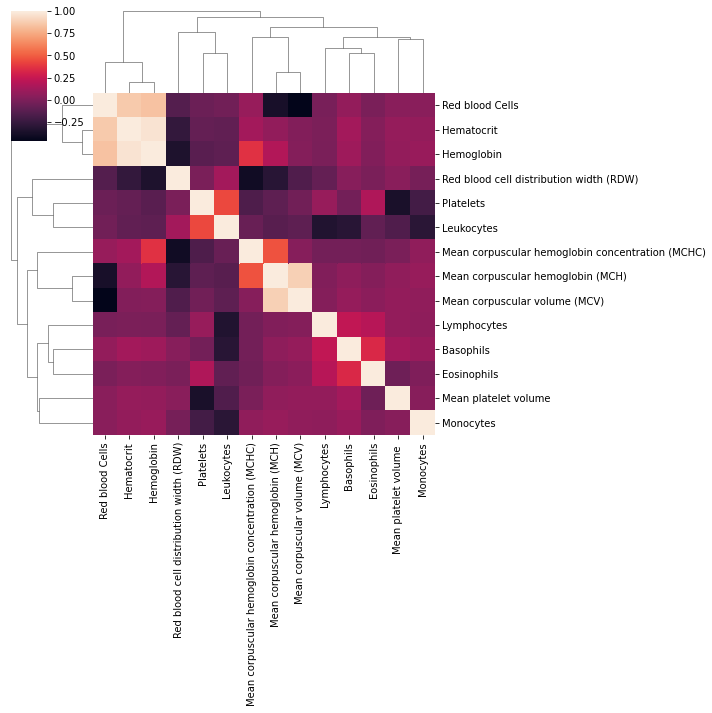

In [30]:
plt.figure(figsize=(20, 10))
sns.clustermap(df[blood_columns].corr())

Influenza/Rapid Test

In [31]:
df['Influenza A, rapid test'].unique()

array([nan, 'negative', 'positive'], dtype=object)

In [32]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [33]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

Viral/Blood

In [34]:
df['is sick'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >=1

In [35]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \


In [36]:
sick_df = df[df['is sick'] == True]
not_sick_df = df[df['is sick'] == False]

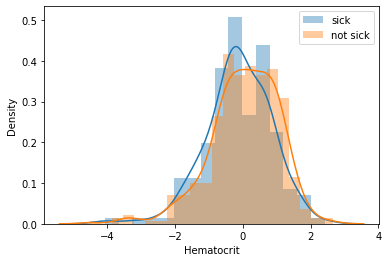

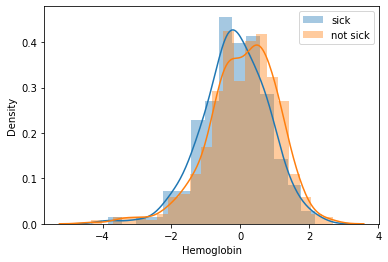

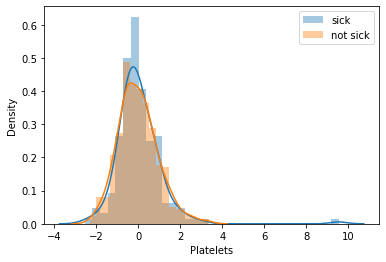

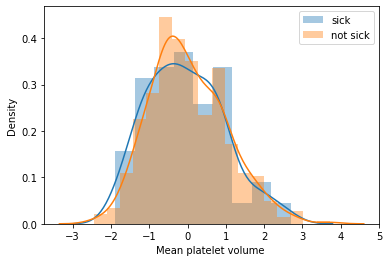

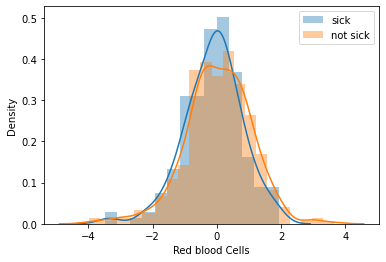

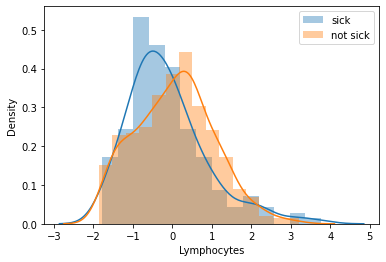

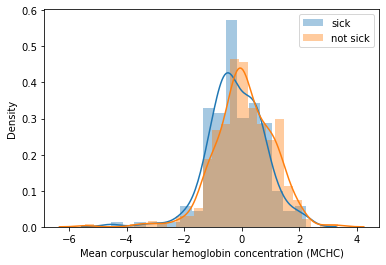

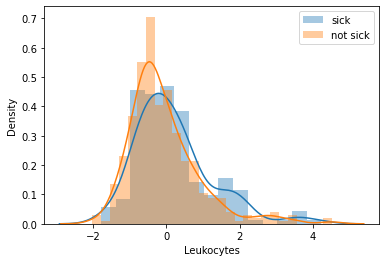

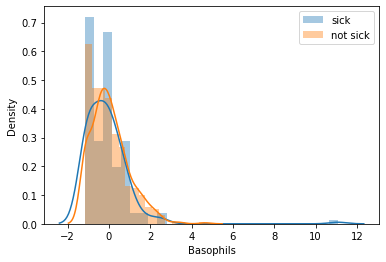

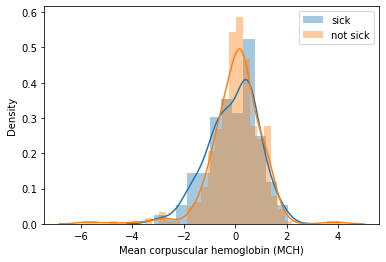

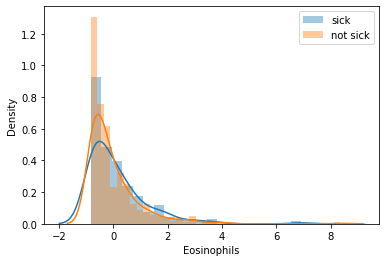

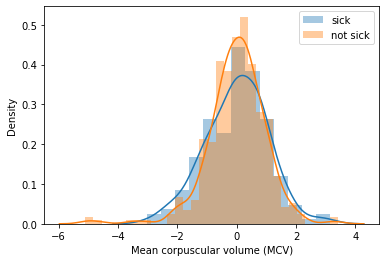

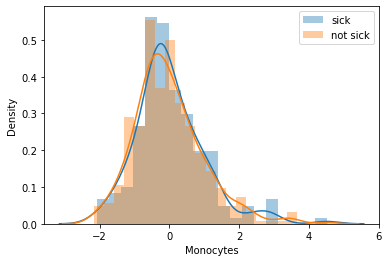

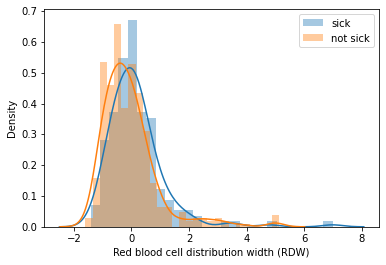

In [37]:
for col in blood_columns:
    plt.figure()
    sns.distplot(sick_df[col], label='sick')
    sns.distplot(not_sick_df[col], label='not sick')
    plt.legend()

In [38]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'regular'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'semi-intensive'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'intensive'
    else:
        return 'uknown'

In [39]:
df['statut'] = df.apply(hospitalisation, axis=1)

In [40]:
df.head()


Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \


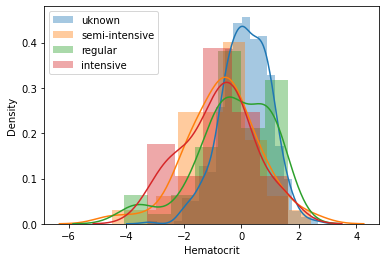

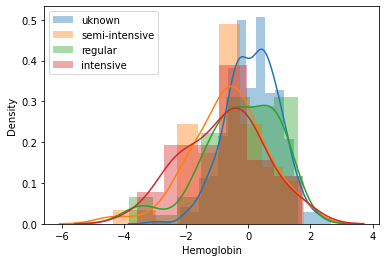

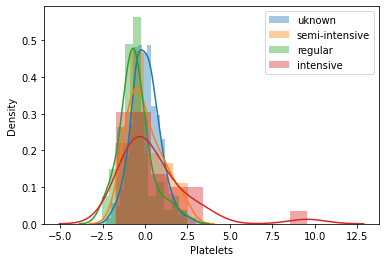

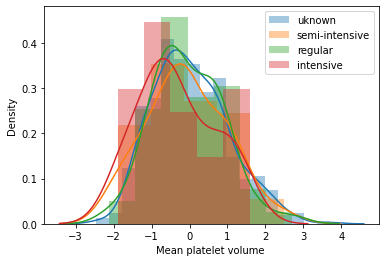

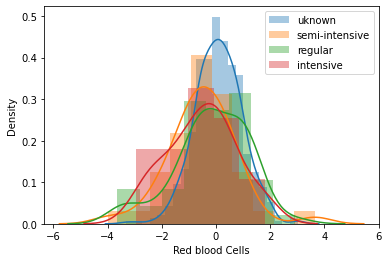

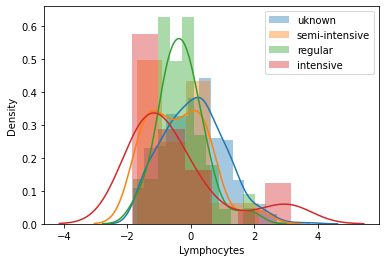

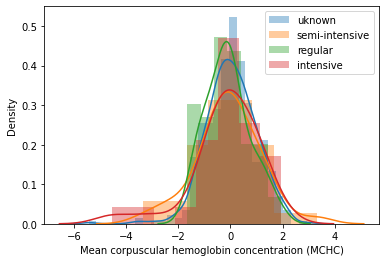

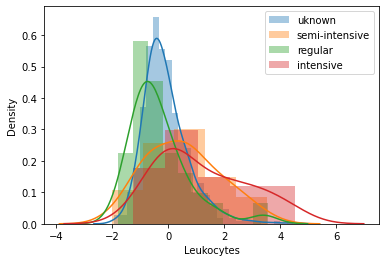

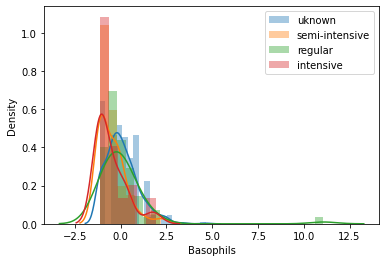

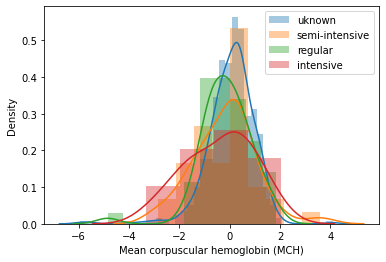

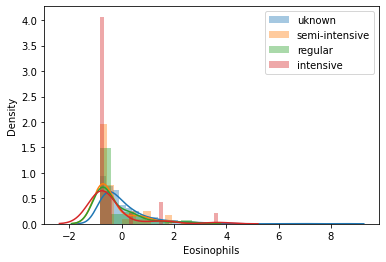

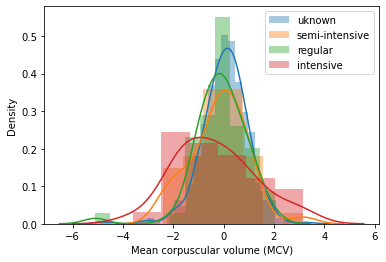

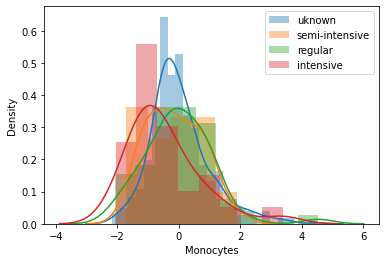

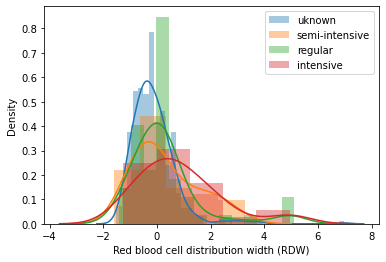

In [41]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

**Let's finally check If we could just work with one one group among the two we identified**

<AxesSubplot:ylabel='Patient ID'>

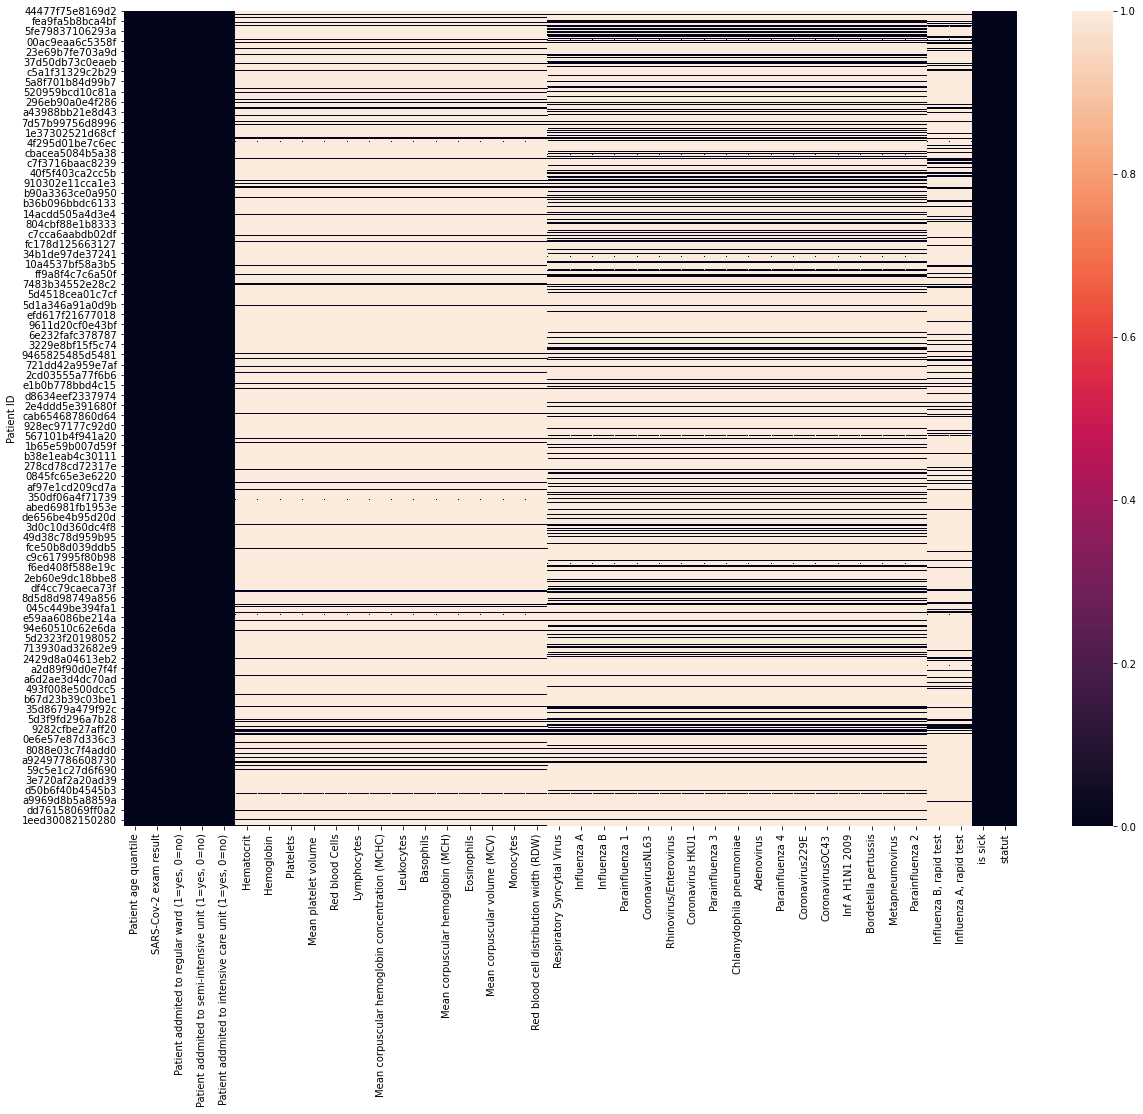

In [42]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.isna())

In [43]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [44]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [45]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [46]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [47]:
df2 = df[blood_columns]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

negative    0.864548
positive    0.135452
Name: covid, dtype: float64

### <font color='Light Blue'>3. Pre-processing</font>

In [48]:
df = data.copy()
df.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \


##### **Creating subsets based on the EDA**

In [49]:
missing_rate = df.isna().sum()/df.shape[0]

In [50]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [51]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [52]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  \
Patient ID                                                                 
44477f75e8169d2                    13               negative         NaN   
126e9dd13932f68                    17               negative    0.236515   
a46b4402a0e5696                     8               negative         NaN   
f7d619a94f97c45                     5               negative         NaN   
d9e41465789c2b5                    15               negative         NaN   

                 Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                      
44477f75e8169d2         NaN        NaN                    NaN   
126e9dd13932f68    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN        NaN                    NaN   
f7d619a94f97c45         NaN        NaN                    NaN   
d9e41465789c2b5         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \
Patient ID                                                  
44477f75e8169d2                            NaN        NaN   
126e9dd13932f68                       0.166192   0.357547   
a46b4402a0e5696                            NaN        NaN   
f7d619a94f97c45                            NaN        NaN   
d9e41465789c2b5                            NaN        NaN   

                 Red blood cell distribution width (RDW)  \
Patient ID                                                 
44477f75e8169d2                                      NaN   
126e9dd13932f68                                -0.625073   
a46b4402a0e5696                                      NaN   
f7d619a94f97c45                                      NaN   
d9e41465789c2b5                                      NaN   

                Respiratory Syncytial Virus   Influenza A   Influenza B  \
Patient ID                                                                
44477f75e8169d2                         NaN           NaN           NaN   
126e9dd13932f68                not_detected  not_detected  not_detected   
a46b4402a0e5696                         NaN           NaN           NaN   
f7d619a94f97c45                         NaN           NaN           NaN   
d9e41465789c2b5                not_detected  not_detected  not_detected   

                Parainfluenza 1 CoronavirusNL63 Rhinovirus/Enterovirus  \
Patient ID                                                               
44477f75e8169d2             NaN             Na

##### **Train/Test Set - Data Cleaning - Encoding**

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [55]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [56]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [57]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [58]:
def feature_engineering(df):
    df['is sick'] = df[viral_columns].sum(axis=1) >= 1
    #df = df.drop(viral_columns, axis=1)
    return df

In [59]:
def imputation(df):
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

In [60]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [61]:
X_train, y_train = preprocessing(trainset)

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64


In [62]:
X_test, y_test = preprocessing(testset)

0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


##### **First Modeling - Super useful to do a quick one after pre-processing**

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [64]:
model_1 = RandomForestClassifier(random_state=0)

In [65]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

**Evaluation Process (A function)**


In [66]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [67]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[54  0]
 [11  1]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        54
           1       1.00      0.08      0.15        12

    accuracy                           0.83        66
   macro avg       0.92      0.54      0.53        66
weighted avg       0.86      0.83      0.77        66



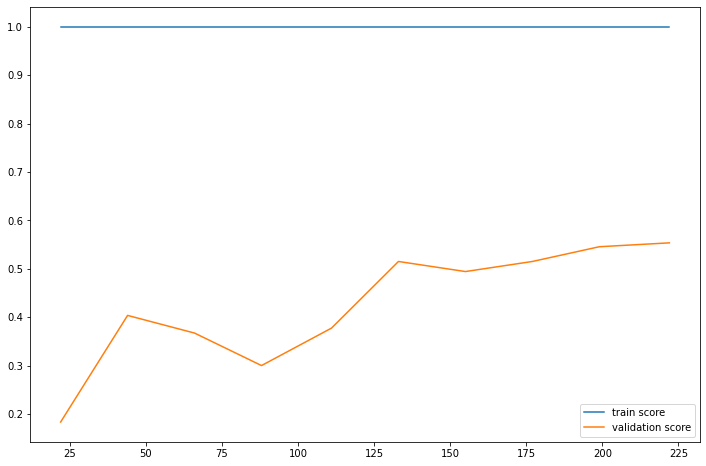

In [68]:
evaluation(model_1)

[[51  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66        66
weighted avg       0.81      0.83      0.82        66



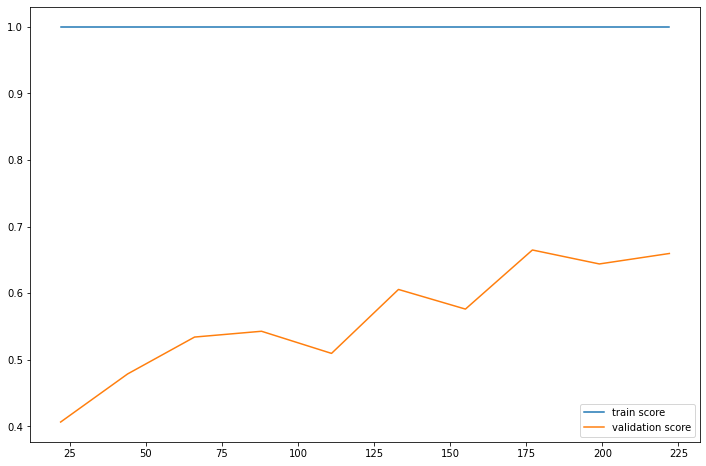

In [69]:
evaluation(model_2)

<AxesSubplot:>

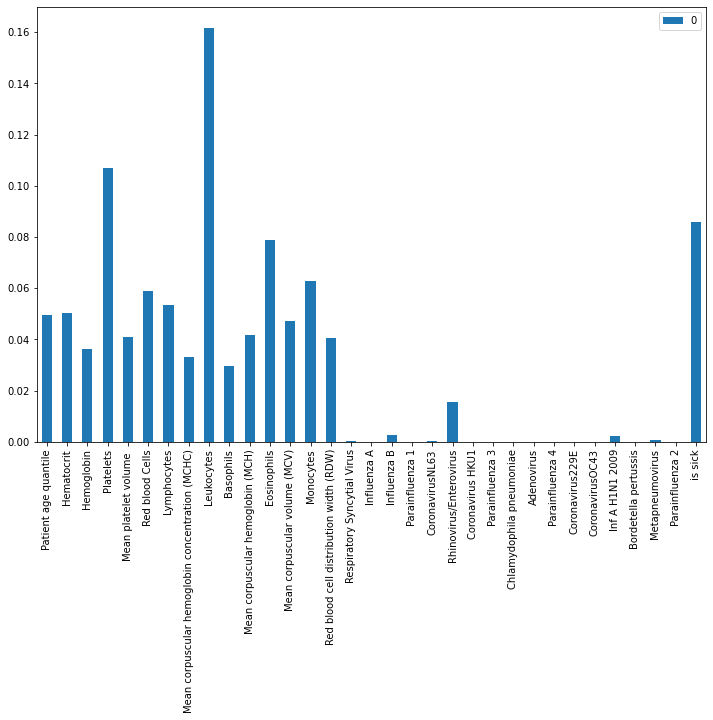

In [70]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

### <font color='Light Blue'>4. Modeling</font>

**We are using the same evaluation process above.**

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [72]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [73]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [74]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[51  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66        66
weighted avg       0.81      0.83      0.82        66

AdaBoost
[[50  4]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.88        54
           1       0.43      0.25      0.32        12

    accuracy                           0.80        66
   macro avg       0.64      0.59      0.60        66
weighted avg       0.77      0.80      0.78        66

SVM
[[51  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66  

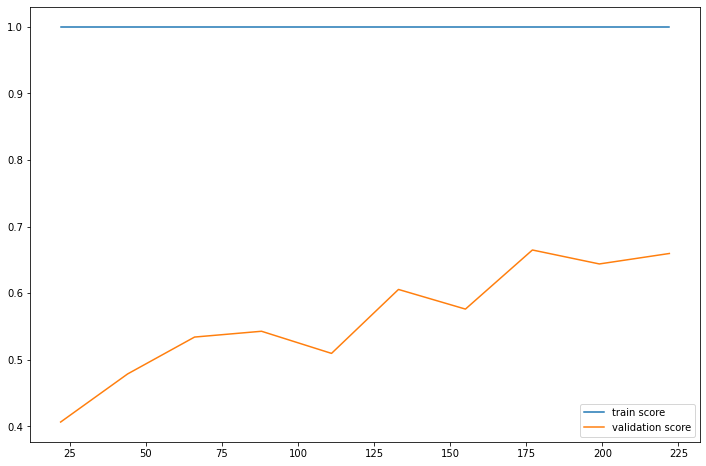

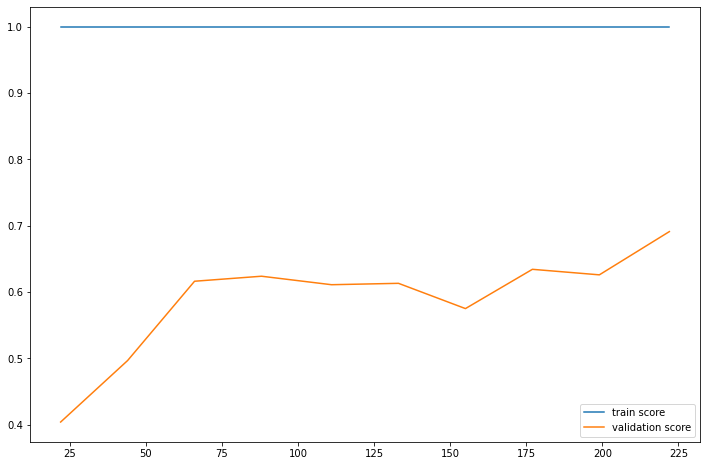

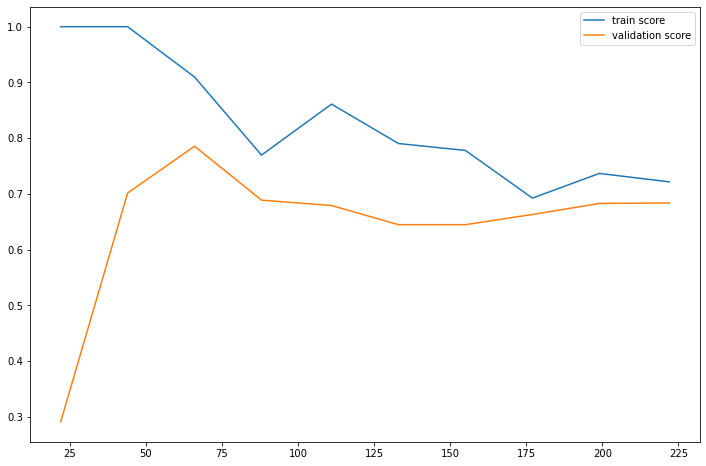

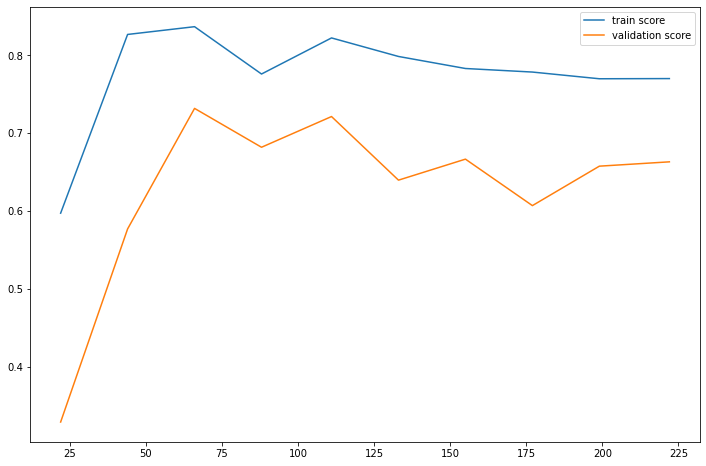

In [75]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

##### **Optimization**

In [76]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [77]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [78]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 59, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        54
           1       0.67      0.50      0.57        12

    accuracy                           0.86        66
   macro avg       0.78      0.72      0.75        66
weighted avg       0.85      0.86      0.86        66



[[51  3]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        54
           1       0.67      0.50      0.57        12

    accuracy                           0.86        66
   macro avg       0.78      0.72      0.75        66
weighted avg       0.85      0.86      0.86        66



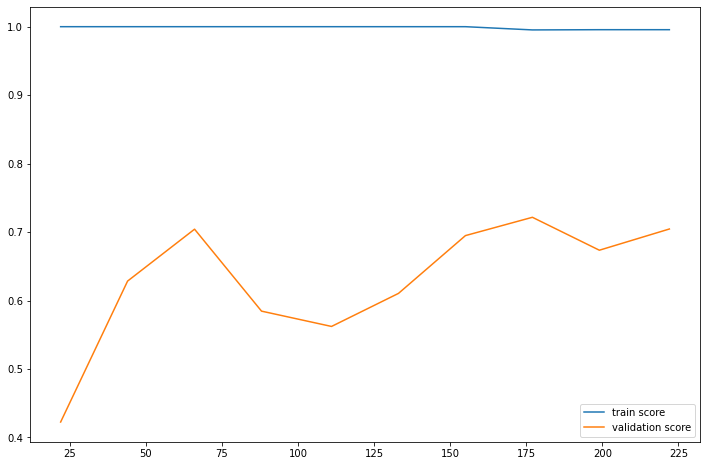

In [79]:
evaluation(grid.best_estimator_)

##### **Precision/Recall Curve**

[Precision Recall Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html?highlight=precision_recall_curve#sklearn.metrics.precision_recall_curve)

In [80]:
from sklearn.metrics import precision_recall_curve

In [81]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

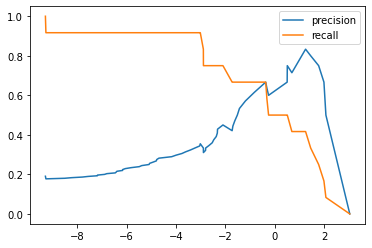

In [82]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [83]:
def final_model(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [100]:
y_pred = final_model(grid.best_estimator_, X_test, threshold=-2)

In [85]:
from sklearn.metrics import recall_score

In [101]:
f1_score(y_test, y_pred)

0.5161290322580646

In [102]:
recall_score(y_test, y_pred)

0.6666666666666666

<div class="alert alert-block alert-success" style= "text-align:center">
<h3>  DIVE INTO CODE Corp. - Machine Learning Engineering Course </h3>
<h4>DIOP Mouhamed</h4>
<h4>Head of the Overseas Mentors | Manager of the SMT Online Unit</h4>
<h4>mouhamed_diop@diveintocode.jp</h4>
</div>